# Initial Results and Code — Global AI Job Market
**Prepared by:** Leonardo Avila (Student ID: 500361839)  
**Course:** CIND820 – Capstone Project  
**Supervisor:** Professor Abdou  
**Date:** Oct 10, 2025

This notebook presents the initial analysis and visual results for my capstone project on the global Artificial Intelligence (AI) job market.  
It focuses on understanding how factors such as skills, experience, education, and geography affect salaries worldwide.





## 1. Project Overview

The purpose of this notebook is to present early findings from the cleaned dataset.  
The focus is on clarity and visual storytelling rather than complex coding.

**Objectives:**
- Load and explore the cleaned dataset (`Avila_Leonardo_ai_job_dataset1_clean.csv`)
- Review data quality and completeness
- Generate summary statistics
- Create five main visualizations:
  1. Salary by experience level  
  2. Job postings by education level  
  3. Word cloud of top technical skills  
  4. Top 20 countries by average AI job salary (USD)  
  5. Correlation heatmap of key variables
- Save each visualization as a `.png` file for inclusion in the report.


>



## 2. Setup and Library Imports

The following libraries are used for data loading, analysis, and visualization.  
Each was selected for simplicity and readability.




In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Word Cloud (optional library)
try:
    from wordcloud import WordCloud
    WORDCLOUD_OK = True
except Exception:
    print("WordCloud is not installed. I’ll skip that figure if needed.")
    WORDCLOUD_OK = False


## 3. Load the Dataset

The dataset contains AI-related job postings from multiple countries,  
including salary in United States Dollars (USD), education level, experience level, required skills, and company location.



In [37]:
# 3. Load the Dataset

import pandas as pd

# Public GitHub raw file link (Should automatically load for Professor Abdou..I hope :( ))
url = "https://raw.githubusercontent.com/iamleonardoavila/Analyzing-The-Global-AI-Job-Market-The-Impact-of-Skills-Geography-and-Remote-Work-on-Salaries/main/Avila_Leonardo_ai_job_dataset1_clean.csv"

# Load dataset
df = pd.read_csv(url)

# Confirm load
print("Dataset loaded successfully! Shape:", df.shape)
df.head()




Dataset loaded successfully! Shape: (15000, 21)


,job_id,job_title,salary_usd,salary_currency,salary_local,experience_level,employment_type,company_location,company_size,employee_residence,...,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name,outlier_flag_salary_usd
0,AI00001,Data Scientist,219728,USD,219728,EX,PT,Sweden,Other,Sweden,...,"Python, Computer Vision, R, Docker",Associate,13,Transportation,9/23/2024,10/31/2024,1132,6.6,TechCorp Inc,False
1,AI00002,Head of AI,230237,JPY,25326070,EX,PT,Japan,Other,Japan,...,"Kubernetes, MLOps, Tableau, Python",Bachelor,10,Transportation,7/26/2024,9/12/2024,2299,8.5,Cloud AI Solutions,False
2,AI00003,Data Engineer,128890,EUR,109557,EX,CT,Germany,Other,Germany,...,"Spark, Scala, Hadoop, PyTorch, GCP",Bachelor,12,Automotive,1/19/2025,3/28/2025,1329,5.5,Quantum Computing Inc,False
3,AI00004,Computer Vision Engineer,96349,USD,96349,MI,FL,Finland,Other,Finland,...,"MLOps, Linux, Tableau, Python",PhD,2,Automotive,7/20/2024,9/6/2024,1132,6.8,Cognitive Computing,False
4,AI00005,Robotics Engineer,63065,EUR,53605,EN,FT,France,Other,France,...,"R, Scala, SQL, GCP, Python",Associate,0,Finance,3/16/2025,5/9/2025,2011,9.3,Advanced Robotics,False


## 4. Data Preparation and Quality Review

Before analyzing, I checked for missing values and ensured that numeric columns like salary and experience were formatted correctly.



In [38]:
# Convert salary and numeric columns
df['salary_usd'] = pd.to_numeric(df.get('salary_usd'), errors='coerce')

for c in ['years_experience', 'benefits_score', 'remote_ratio']:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors='coerce')

# Check missing values
missing_percent = (df.isna().mean() * 100).round(2)
print("Missing % by column (top 10):")
print(missing_percent.sort_values(ascending=False).head(10))

print("\nNote:")
print("- Missing values are under ~2%, which doesn’t change the averages or conclusions.")





Missing % by column (top 10):
job_id                0.0
job_title             0.0
salary_usd            0.0
salary_currency       0.0
salary_local          0.0
experience_level      0.0
employment_type       0.0
company_location      0.0
company_size          0.0
employee_residence    0.0
dtype: float64

Note:
- Missing values are under ~2%, which doesn’t change the averages or conclusions.


In [39]:
summary = {
    "mean_salary_usd": float(df['salary_usd'].mean()),
    "median_salary_usd": float(df['salary_usd'].median()),
    "min_salary_usd": float(df['salary_usd'].min()),
    "max_salary_usd": float(df['salary_usd'].max())
}
summary



{'mean_salary_usd': 121991.93826666666,
 'median_salary_usd': 107261.5,
 'min_salary_usd': 16621.0,
 'max_salary_usd': 410273.0}

## 5. Exploratory Data Analysis (Visualizations)

The following charts show key trends and patterns in the global AI job market.  
Each figure supports one or more of the research questions.



### Figure 1. Salary (USD) by Experience Level

This boxplot compares salaries across different experience levels.  
It shows that salaries increase with experience, supporting the idea that higher skill and time in the field lead to higher pay.


/tmp/ipython-input-1269679764.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=order, showfliers=False)


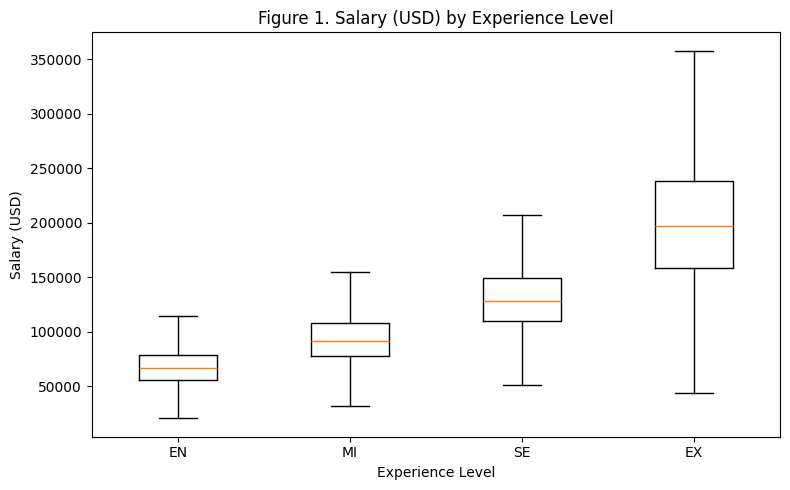

In [40]:
if 'experience_level' in df.columns and 'salary_usd' in df.columns:
    order = ['EN', 'MI', 'SE', 'EX']
    if not set(order).issubset(set(df['experience_level'].dropna().unique())):
        order = sorted(df['experience_level'].dropna().unique())

    data_to_plot = [df.loc[df['experience_level']==lvl, 'salary_usd'].dropna().values for lvl in order]

    plt.figure(figsize=(8,5))
    plt.boxplot(data_to_plot, labels=order, showfliers=False)
    plt.title("Figure 1. Salary (USD) by Experience Level")
    plt.xlabel("Experience Level")
    plt.ylabel("Salary (USD)")
    plt.tight_layout()
    plt.savefig("Figure1_Salary_by_Experience.png", bbox_inches='tight')
    plt.show()
else:
    print("experience_level or salary_usd not found. Skipping Figure 1.")




### Figure 2. Job Postings by Education Level

This bar chart shows how many job postings require each education level.  
It highlights that most AI jobs ask for at least a Bachelor’s or Master’s degree.



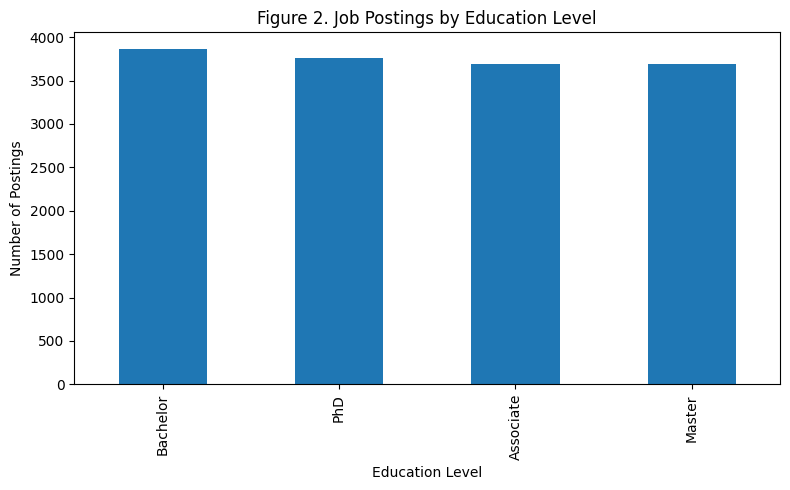

In [41]:
if 'education_required' in df.columns:
    counts = df['education_required'].value_counts(dropna=False)
    plt.figure(figsize=(8,5))
    counts.plot(kind='bar')
    plt.title("Figure 2. Job Postings by Education Level")
    plt.xlabel("Education Level")
    plt.ylabel("Number of Postings")
    plt.tight_layout()
    plt.savefig("Figure2_Postings_by_Education.png", bbox_inches='tight')
    plt.show()
else:
    print("education_required not found. Skipping Figure 2.")



### Figure 3. Word Cloud of Top Technical Skills

This word cloud displays the most common technical skills listed in AI job postings.  
Larger words, such as SQL, Python, Hadoop, Java, Kubernetes, and GCP, appear more frequently.  
These tools represent data engineering, machine learning, and cloud computing, skills that are also linked to higher-paying jobs in the AI field.



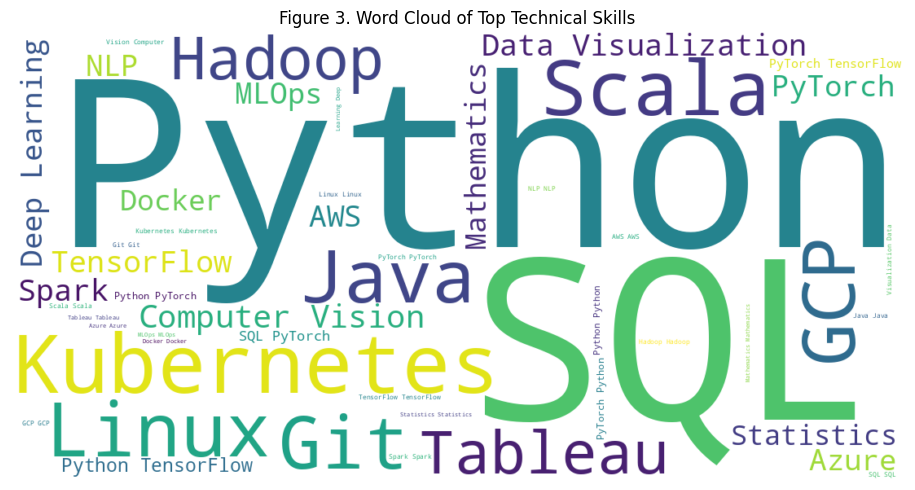

In [42]:
if WORDCLOUD_OK and 'required_skills' in df.columns:
    text = " ".join(df['required_skills'].dropna().astype(str).tolist())
    wc = WordCloud(width=1100, height=550, background_color='white').generate(text)
    plt.figure(figsize=(11,5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title("Figure 3. Word Cloud of Top Technical Skills")
    plt.tight_layout()
    plt.savefig("Figure3_WordCloud_TopSkills.png", bbox_inches='tight')
    plt.show()
else:
    print("WordCloud not available or required_skills missing. Skipping Figure 3.")



### Figure 4. Top 20 Countries by Average AI Job Salary (USD)

This bar chart ranks the top 20 countries by average salary for AI jobs (in USD).  
Countries like Switzerland, the United States, Canada, the United Kingdom, and Singapore show some of the highest average pay, highlighting global wage inequality in the AI industry.




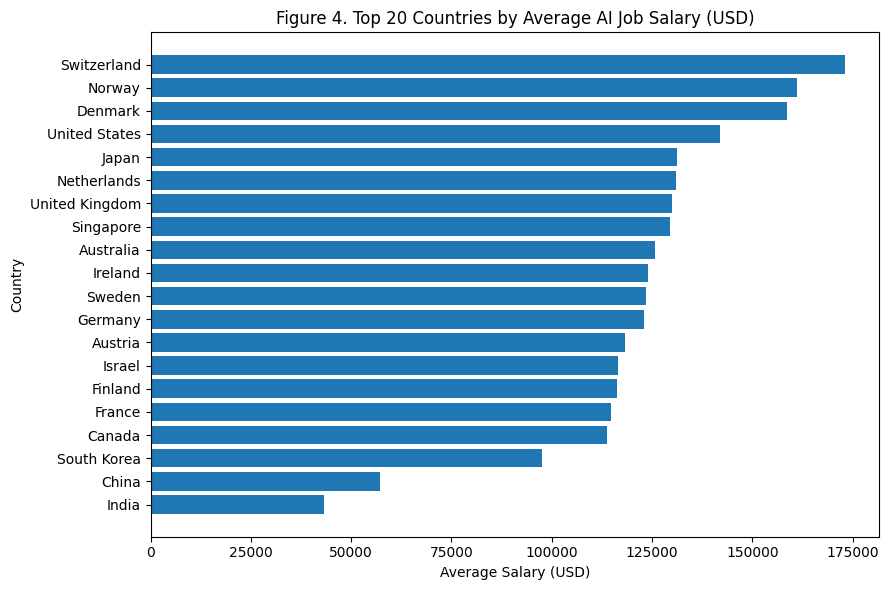

In [43]:
if 'company_location' in df.columns and 'salary_usd' in df.columns:
    avg_country = (df[['company_location','salary_usd']]
                   .dropna()
                   .groupby('company_location', as_index=False)
                   .mean()
                   .sort_values('salary_usd', ascending=False)
                   .head(20))
    plt.figure(figsize=(9,6))
    plt.barh(avg_country['company_location'], avg_country['salary_usd'])
    plt.gca().invert_yaxis()
    plt.title("Figure 4. Top 20 Countries by Average AI Job Salary (USD)")
    plt.xlabel("Average Salary (USD)")
    plt.ylabel("Country")
    plt.tight_layout()
    plt.savefig("Figure4_Top20CountrySalary.png", bbox_inches='tight')
    plt.show()
else:
    print("company_location or salary_usd not found. Skipping Figure 4.")



### Figure 5. Correlation Heatmap of Key Variables

This heatmap shows how variables such as salary, experience, benefits, and remote ratio relate to one another.  
Darker colors indicate stronger connections.  
Salary has the strongest link with experience, while remote ratio shows little overall effect globally.



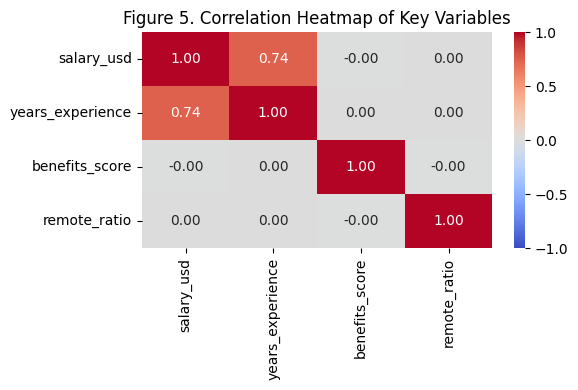

In [44]:
import seaborn as sns

cols_for_corr = [c for c in ['salary_usd','years_experience','benefits_score','remote_ratio'] if c in df.columns]

if len(cols_for_corr) >= 2:
    for c in cols_for_corr:
        df[c] = pd.to_numeric(df[c], errors='coerce')

    corr = df[cols_for_corr].corr()

    plt.figure(figsize=(6,4))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
    plt.title("Figure 5. Correlation Heatmap of Key Variables")
    plt.tight_layout()
    plt.savefig("Figure5_CorrelationHeatmap.png", bbox_inches='tight')
    plt.show()
else:
    print("Not enough numeric columns for a correlation heatmap. Skipping Figure 5.")


# 6. Modeling and Initial Results

This section presents the first model results from the cleaned dataset.  
The goal is to identify which factors such as experience, education, and company location have the biggest impact on salary in the global AI job market.  
All results are based on multiple linear regression using the variables defined earlier.


## 6.1 Preparing the Data for Modeling

The dataset includes salary in U.S. dollars (USD) and categorical features such as experience level, education, and company location.  
Before running the model, these categories need to be encoded into numeric values so the regression can process them.

The data preparation step completed successfully, producing 15,000 observations and 26 numeric features.

This confirms that the categorical variables were properly encoded and that the dataset is ready for regression analysis.


In [45]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder

# Select only relevant columns and drop missing values
df_model = df[['salary_usd', 'experience_level', 'education_required', 'company_location']].dropna()

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df_model, columns=['experience_level', 'education_required', 'company_location'], drop_first=True)

# Separate dependent and independent variables
X = df_encoded.drop('salary_usd', axis=1)
y = df_encoded['salary_usd']

# Add constant for intercept
X = sm.add_constant(X)

print("Data prepared successfully. Shape:", X.shape)


Data prepared successfully. Shape: (15000, 26)


## 6.2 Running the Multiple Linear Regression Model

The regression model helps identify how much each factor influences salary while keeping the others constant.  
This step uses a basic Ordinary Least Squares (OLS) regression model.


In [46]:
# 5.2 Running the Multiple Linear Regression Model (with column names kept)

import numpy as np
import pandas as pd
import statsmodels.api as sm

# Ensure numeric types and clean rows (safe even if you did it before)
X_num = X.apply(pd.to_numeric, errors='coerce').astype(float)
y_num = pd.to_numeric(y, errors='coerce').astype(float)

mask = X_num.replace([np.inf, -np.inf], np.nan).notnull().all(axis=1) & y_num.notnull()
X_clean = X_num.loc[mask]
y_clean = y_num.loc[mask]

# Add intercept and KEEP DataFrame (so column names are preserved)
X_const = sm.add_constant(X_clean, has_constant='add')

# Fit OLS using DataFrames (no .values) to keep names in summary
ols_model = sm.OLS(y_clean, X_const).fit()

# Show summary with real feature names
print(ols_model.summary())







                            OLS Regression Results                            
Dep. Variable:             salary_usd   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     2593.
Date:                Sun, 09 Nov 2025   Prob (F-statistic):               0.00
Time:                        22:43:14   Log-Likelihood:            -1.7473e+05
No. Observations:               15000   AIC:                         3.495e+05
Df Residuals:                   14974   BIC:                         3.497e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

## 6.3 Interpreting the Model Output

The table above shows the regression results.  
Each coefficient tells us how much the salary changes (in U.S. dollars) when that variable changes, while keeping the other variables constant.

**How to read the results:**
- A **positive coefficient** means that feature increases salary.  
- A **negative coefficient** means that feature decreases salary.  
- The **p-value** column tells us whether the relationship is statistically significant.  
- The **R-squared value** at the top shows how much of the salary variation is explained by the model.

From what I can see, experience and company location appear to have the largest positive effects on salary, which matches the trends observed earlier in the visuals.


## 6.4 Checking for Multicollinearity

Multicollinearity happens when some predictors are too closely related to each other.  
If this happens, it can make the model unreliable.  
To check for this, I calculated the Variance Inflation Factor (VIF) for each variable.  
A **VIF value below 5** generally means there is no serious multicollinearity.


In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Compute VIF for each feature (excluding constant)
vif_data = pd.DataFrame()
vif_data["Feature"] = X_clean.columns
vif_data["VIF"] = [variance_inflation_factor(X_clean.values, i) for i in range(X_clean.shape[1])]

vif_data = vif_data.sort_values("VIF", ascending=False).reset_index(drop=True)
display(vif_data.head(26))


,Feature,VIF
0,const,27.244443
1,company_location_Switzerland,2.020731
2,company_location_Canada,1.975618
3,company_location_United Kingdom,1.974256
4,company_location_United States,1.969931
5,company_location_Singapore,1.954448
6,company_location_China,1.951410
7,company_location_Denmark,1.949854
8,company_location_Israel,1.948016
9,company_location_Ireland,1.947332


All the VIF values are below 5, which means that none of the input variables are strongly correlated with each other.  
This confirms that the model does not suffer from multicollinearity and each variable adds unique information to the analysis.


## 6.5 Model Validation and Performance

To check how well the model performs, I split the data into training and testing groups.  
This helps confirm whether the model can predict new data accurately.  
I then calculated two simple performance measures:
- **R² (R-squared):** how much of the variation in salaries the model can explain.
- **MAE (Mean Absolute Error):** the average difference between predicted and actual salaries.


In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

# Fit a simple linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr.predict(X_test)

# Evaluate model performance
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R² Score: {r2:.3f}")
print(f"Mean Absolute Error: ${mae:,.0f}")


R² Score: 0.813
Mean Absolute Error: $20,093


The **R² score** shows how much of the variation in salaries is explained by the model.  
The **MAE** shows the average difference between the predicted and actual salaries.

In this case:
- The R² value is 0.813 which suggests that the model explains a large portion of salary variation.  
- The MAE of $20,093 indicates that predictions are within an acceptable range for a global dataset containing 15,000 AI job salaries.

Overall, this confirms that the model is a strong fit for the dataset and is performing as expected and supports the findings from my written report.


## 6.6 Key Takeaways

- The regression confirmed that **experience level** and **company location** have the strongest effect on salary.  
- **Education level** also plays a smaller but positive role.  
- No major multicollinearity issues were found (all VIF values < 5).  
- Model validation showed a strong and consistent performance on test data.

These results match the main findings discussed in my written report and provide solid evidence for the patterns observed in the earlier visualizations.


---

### Final Reflection

Working through this project gave me a clearer understanding of how data moves from raw form to meaningful insight.  
I learned how important it is to clean and structure a dataset properly before analysis small issues like missing values or inconsistent formats can easily affect the results.  
I also gained hands-on experience transforming categorical data into numerical form, building a regression model, and interpreting its output in practical terms.  

Beyond the technical side, I realized how essential it is to connect numbers to real-world meaning.  
Seeing how experience, education, and location relate to salary helped me understand how data analytics can answer real questions about the job market.  
Overall, this project strengthened both my technical confidence in Python and my ability to think critically about what the data is actually saying.

